In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss
import itertools


# AGREGAR COMENTARIOS Y EXPLICACIONES

# Función de optimización de DBSCAN

El siguiente codigo define una funcion que permite poner a prueba muchos modelos de DBSCAN con distintos parametros y calcular su score de silhouette para hallar la combinacion de parametros que devuelve el modelo con score maximo. 

Primero especificamos las combinaciones de epsilon y min_sample que queremos probar.  

In [2]:
epsilons = np.linspace(0.01, 1, num=30)
epsilons

array([0.01      , 0.04413793, 0.07827586, 0.11241379, 0.14655172,
       0.18068966, 0.21482759, 0.24896552, 0.28310345, 0.31724138,
       0.35137931, 0.38551724, 0.41965517, 0.4537931 , 0.48793103,
       0.52206897, 0.5562069 , 0.59034483, 0.62448276, 0.65862069,
       0.69275862, 0.72689655, 0.76103448, 0.79517241, 0.82931034,
       0.86344828, 0.89758621, 0.93172414, 0.96586207, 1.        ])

In [3]:
min_samples = np.arange(2, 20, step=1)
min_samples

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])

In [4]:

combinations = list(itertools.product(epsilons, min_samples))

In [5]:
type(min_samples)

numpy.ndarray

Cantidad de combinaciones de parametros que se van a probar:

In [6]:
N = len(combinations)
print(f"Se pondran a prueba {N} combinaciones de {len(epsilons)} valores de epsilon y {len(min_samples)} valores de min_samples.")

Se pondran a prueba 540 combinaciones de 30 valores de epsilon y 18 valores de min_samples.


Definimos la funcion:

In [7]:
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1

    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue

    scores.append(ss(X, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1],
          'best_labels': best_labels,
          'best_score': best_score}



# De que fuentes proviene la electricad que consumimos?

Que paises se incluyen. De donde surge el dataset.

# MODELO NO SUPERVISADO

In [8]:
df = pd.read_csv(r"../datasets/wec_ns.csv")
df.head(5)

,country,population,low_carbon_share_elec,fossil_share_elec,renewables_share_elec,nuclear_share_elec,fossil_cons_per_capita,per_capita_electricity,continente,iso_code
0,Afghanistan,34.247333,83.543444,16.456556,83.543444,0.0,5.156111,31.813000,Asia,AFG
1,Albania,2.896444,99.851444,0.148556,99.851444,0.0,2.103889,1998.432000,Europa,ALB
2,Algeria,39.784222,0.766333,99.233667,0.766333,0.0,1568.103333,1580.157222,África,DZA
3,American Samoa,0.055778,0.000000,100.000000,0.000000,0.0,2888.744333,2888.744333,Oceanía,ASM
4,Angola,27.940556,65.673556,34.326444,65.673556,0.0,110.650000,326.007889,África,AGO


In [9]:
df.shape

(203, 10)

In [10]:
features4 = ["fossil_share_elec", "renewables_share_elec","nuclear_share_elec"]
X4 = df[features4]
X4.head(5)

,fossil_share_elec,renewables_share_elec,nuclear_share_elec
0,16.456556,83.543444,0.0
1,0.148556,99.851444,0.0
2,99.233667,0.766333,0.0
3,100.000000,0.000000,0.0
4,34.326444,65.673556,0.0


In [11]:
pd.DataFrame(X4).head(5)

,fossil_share_elec,renewables_share_elec,nuclear_share_elec
0,16.456556,83.543444,0.0
1,0.148556,99.851444,0.0
2,99.233667,0.766333,0.0
3,100.000000,0.000000,0.0
4,34.326444,65.673556,0.0


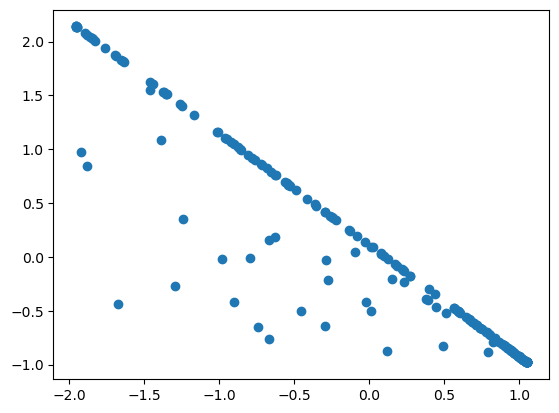

In [12]:
X4_scaled = StandardScaler().fit_transform(X4)

plt.scatter(X4_scaled[:, 0], X4_scaled[:, 1])

In [13]:
best_dict4 = get_scores_and_labels(combinations, X4_scaled)

Index: 0, Score: 0.10754848631983081, Labels: [-1  0  1  1 -1  2 -1 -1  3  3 -1 -1  1  1  2  2  2 -1  4  5  1  0 -1 -1
  1 -1  1  1 -1  6  7 -1 -1 -1  1  4  2 -1 -1 -1  5 -1  8 -1 -1 -1 -1 -1
  0 -1  1  9 -1 -1 -1 -1 10  5  3  0 11 -1 -1 -1 -1 -1  1 12 -1 11  1 13
  7  2 14  2 -1 15  2  2  6 -1  1 -1  0 -1 -1 -1 -1 -1  2 -1 16 -1 17 18
 12 18  1 19 -1 -1  5  0  1  1 -1 -1 20 19 14  1 -1 21  5 -1 -1 -1 -1 22
 23  1  6 -1 -1  1  0 -1  6 12 15  2 -1  1 -1 -1  1 -1  1 -1 10  0 -1 13
 14 -1 17  1 -1 -1 -1  1  5  1  2  6 -1 16  1  8 -1  1 24  5 -1 -1 -1  5
 -1 -1  1 -1 -1 24 20 -1 -1 21 -1 -1 -1 14 -1  1  1  5  9  1  1 -1 -1  1
 -1 -1  1 -1 -1  6 -1 -1 22 -1 23], NumClusters: 25
Index: 1, Score: -0.0487341541392844, Labels: [-1  0  1  1 -1  2 -1 -1  3  3 -1 -1  1  1  2  2  2 -1 -1  4  1  0 -1 -1
  1 -1  1  1 -1  5 -1 -1 -1 -1  1 -1  2 -1 -1 -1  4 -1 -1 -1 -1 -1 -1 -1
  0 -1  1 -1 -1 -1 -1 -1 -1  4  3  0 -1 -1 -1 -1 -1 -1  1  6 -1 -1  1 -1
 -1  2  7  2 -1 -1  2  2  5 -1  1 -1  0 -1 -1 -1 -1 -

Index: 130, Score: 0.4231639469955956, Labels: [ 0  1  2  2  2  2 -1 -1  2  2  0  2  2  2  2  2  2 -1  1  2  2  1  2  2
  2  0  2  2 -1  2  0  2  2 -1  2  1  2  2 -1  0  2  2  2  1  2  2  2 -1
  1  2  2  2  2  2  2  2  2  2  2  1  2 -1 -1  2  2  2  2  0 -1  2  2  2
  0  2  2  2  2  2  2  2  2  2  2 -1  1 -1  2  2  2  2  2  2  2 -1  2  2
  0  2  2  1  0  2  2  1  2  2  2  2  2  1  2  2  2  2  2  2  2 -1  2  2
  2  2  2  1  1  2  1 -1  2  0  2  2  2  2  0  1  2 -1  2  2  2  1  2  2
  2  2  2  2 -1 -1  2  2  2  2  2  2  2  2  2  2  2  2  2  2 -1 -1  2  2
 -1 -1  2 -1  2  2  2 -1 -1  2 -1  1  2  2  2  2  2  2  2  2  2  1 -1  2
 -1 -1  2  1  2  2  2  2  2  1  2], NumClusters: 3
Index: 131, Score: 0.4231639469955956, Labels: [ 0  1  2  2  2  2 -1 -1  2  2  0  2  2  2  2  2  2 -1  1  2  2  1  2  2
  2  0  2  2 -1  2  0  2  2 -1  2  1  2  2 -1  0  2  2  2  1  2  2  2 -1
  1  2  2  2  2  2  2  2  2  2  2  1  2 -1 -1  2  2  2  2  0 -1  2  2  2
  0  2  2  2  2  2  2  2  2  2  2 -1  1 -1  2  2  2 

In [14]:
best_dict4

{'best_epsilon': 0.14655172413793105,
 'best_min_samples': 5,
 'best_labels': array([ 4,  0,  1,  1,  2,  1, -1, -1,  1,  1,  4,  1,  1,  1,  1,  1,  1,
        -1,  0,  1,  1,  0,  3,  3,  1, -1,  1,  1, -1,  1,  4,  3,  2, -1,
         1,  0,  1,  3, -1,  4,  1,  3,  1,  0,  2,  1,  1, -1,  0,  2,  1,
         3,  1,  2,  1,  2,  3,  1,  1,  0,  2, -1, -1,  2,  3,  3,  1,  4,
        -1,  2,  1,  3,  4,  1,  1,  1,  2,  2,  1,  1,  1,  2,  1, -1,  0,
        -1,  1,  1,  1,  3,  1,  3,  1, -1,  1,  1,  4,  1,  1,  0,  4,  2,
         1,  0,  1,  1,  2,  3,  3,  0,  1,  1,  2,  1,  1,  3, -1, -1,  1,
         1,  2,  1,  1,  0,  0,  1,  0, -1,  1,  4,  2,  1, -1,  1,  4,  0,
         1, -1,  1,  2,  3,  0,  2,  3,  1,  2,  1,  1, -1, -1,  2,  1,  1,
         1,  1,  1,  3,  1,  1,  1,  3,  1,  2,  1, -1, -1,  1,  1, -1, -1,
         1, -1,  3,  2,  3, -1, -1,  1, -1,  0,  3,  1,  3,  1,  1,  1,  3,
         1,  1,  0, -1,  1, -1, -1,  1,  0,  1,  1,  2,  3,  1,  0,  2],
       dtype=i

In [15]:
df['cluster4'] = best_dict4['best_labels']

df['cluster4'].value_counts()

cluster4
 1    91
-1    32
 2    25
 3    25
 0    20
 4    10
Name: count, dtype: int64

In [16]:
cluster0 = df.loc[df["cluster4"] == 0, "country"]
cluster0

1                           Albania
18                           Belize
21                           Bhutan
35         Central African Republic
43                       Costa Rica
48     Democratic Republic of Congo
59                         Ethiopia
84                          Iceland
99                       Kyrgyzstan
103                         Lesotho
109                          Malawi
123                      Mozambique
124                         Namibia
126                           Nepal
135                          Norway
141                        Paraguay
179                      Tajikistan
189                          Uganda
195                         Uruguay
201                          Zambia
Name: country, dtype: object

In [17]:
cluster1 = df.loc[df["cluster4"] == 1, "country"]
cluster1

2                               Algeria
3                        American Samoa
5                   Antigua and Barbuda
8                                 Aruba
9                             Australia
11                           Azerbaijan
12                              Bahamas
13                              Bahrain
14                           Bangladesh
15                             Barbados
16                              Belarus
19                                Benin
20                              Bermuda
24                             Botswana
26               British Virgin Islands
27                               Brunei
29                         Burkina Faso
34                       Cayman Islands
36                                 Chad
40                              Comoros
42                         Cook Islands
45                                 Cuba
46                               Cyprus
50                             Djibouti
52                   Dominican Republic


In [18]:
cluster2 = df.loc[df["cluster4"] == 2, "country"]
cluster2

4             Angola
32          Cameroon
44           Croatia
49           Denmark
53           Ecuador
55       El Salvador
60              Fiji
63     French Guiana
69             Ghana
76         Guatemala
77            Guinea
81          Honduras
101           Latvia
106        Lithuania
112             Mali
120       Montenegro
130        Nicaragua
139           Panama
142             Peru
145         Portugal
150           Rwanda
162     Sierra Leone
173            Sudan
198        Venezuela
202         Zimbabwe
Name: country, dtype: object

In [19]:
ruido = df.loc[df["cluster4"] == -1, "country"]
ruido

6           Argentina
7             Armenia
17            Belgium
25             Brazil
28           Bulgaria
33             Canada
38              China
47            Czechia
61            Finland
62             France
68            Germany
83            Hungary
85              India
93              Japan
116         Mauritius
117            Mexico
127       Netherlands
132           Nigeria
137          Pakistan
148           Romania
149            Russia
164          Slovakia
165          Slovenia
168      South Africa
169       South Korea
171             Spain
175            Sweden
176       Switzerland
178            Taiwan
190           Ukraine
192    United Kingdom
193     United States
Name: country, dtype: object

In [20]:
fig = px.scatter(x=df["fossil_share_elec"], y=df["renewables_share_elec"], color=df['cluster4'])
fig.show()

In [21]:
fig = px.scatter(x=df["nuclear_share_elec"], y=df["renewables_share_elec"], color=df['cluster4'])
fig.show()

In [22]:
df_ruido = df[df["cluster4"] == -1]

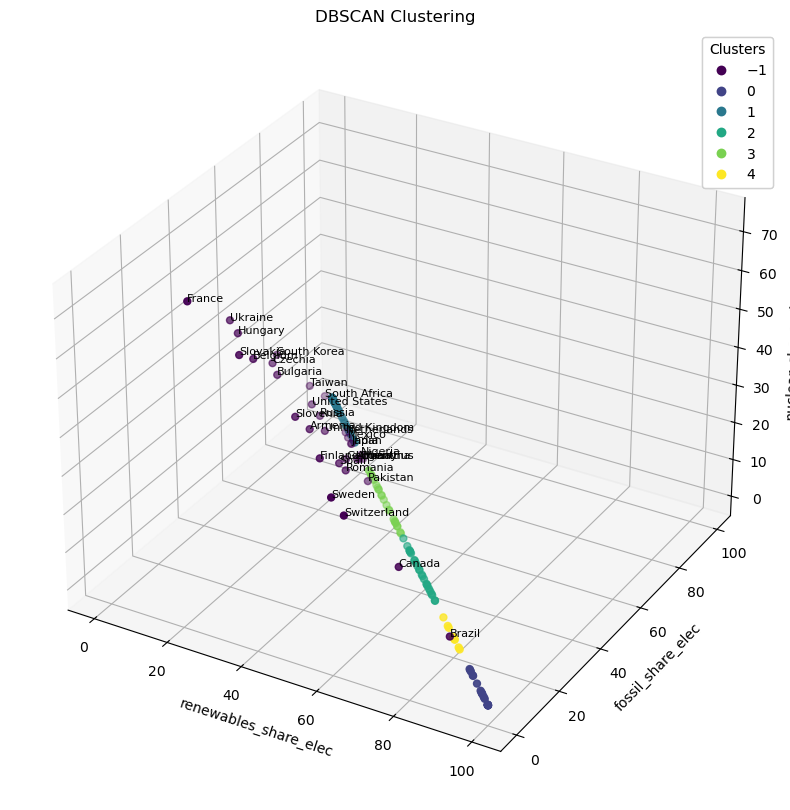

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Suponiendo que tienes un DataFrame llamado df con la columna 'country'
# Asegúrate de tener la columna 'country' en tu DataFrame

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['renewables_share_elec'], df['fossil_share_elec'], df['nuclear_share_elec'],
                     c=df['cluster4'], cmap='viridis', s=25)

# Iterar a través de cada punto y agregar el texto correspondiente
for country, x, y, z in zip(df_ruido['country'], df_ruido['renewables_share_elec'], df_ruido['fossil_share_elec'], df_ruido['nuclear_share_elec']):
    ax.text(x, y, z, country, fontsize=8)

ax.set_xlabel('renewables_share_elec')
ax.set_ylabel('fossil_share_elec')
ax.set_zlabel('nuclear_share_elec')
ax.set_title('DBSCAN Clustering')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()


In [24]:
df.sort_values("nuclear_share_elec")

,country,population,low_carbon_share_elec,fossil_share_elec,renewables_share_elec,nuclear_share_elec,fossil_cons_per_capita,per_capita_electricity,continente,iso_code,cluster4
0,Afghanistan,34.247333,83.543444,16.456556,83.543444,0.000000,5.156111,31.813000,Asia,AFG,4
120,Montenegro,0.626889,55.749444,44.250556,55.749444,0.000000,2162.070222,5001.308222,Europa,MNE,2
121,Montserrat,0.005000,0.000000,100.000000,0.000000,0.000000,3925.925889,3925.925889,Norteamérica,MSR,1
122,Morocco,34.644889,15.340222,84.659778,15.340222,0.000000,697.677111,827.142556,África,MAR,1
123,Mozambique,27.142333,90.126111,9.873889,90.126111,0.000000,59.980444,620.169667,África,MOZ,0
124,Namibia,2.319778,97.596333,2.403667,97.596333,0.000000,15.070222,618.638333,África,NAM,0
125,Nauru,0.010333,0.000000,100.000000,0.000000,0.000000,2721.885556,2721.885556,Oceanía,NRU,1
126,Nepal,27.385444,99.905111,0.094889,99.905111,0.000000,0.124000,149.527667,Asia,NPL,0
128,New Caledonia,0.270556,15.024333,84.975667,15.024333,0.000000,8474.586889,9927.835444,Oceanía,NCL,1
129,New Zealand,4.608444,79.998000,20.002000,79.998000,0.000000,1858.207600,9257.996800,Oceanía,NZL,4


In [25]:
suram = df[df["continente"] == "Sudamérica"]

In [26]:
suram.sort_values("nuclear_share_elec")

,country,population,low_carbon_share_elec,fossil_share_elec,renewables_share_elec,nuclear_share_elec,fossil_cons_per_capita,per_capita_electricity,continente,iso_code,cluster4
22,Bolivia,10.866778,31.721000,68.279000,31.721000,0.0000,529.824700,775.388700,Sudamérica,BOL,3
37,Chile,18.032667,43.702900,56.297100,43.702900,0.0000,2255.461200,4013.349500,Sudamérica,CHL,3
39,Colombia,47.756444,73.789700,26.210300,73.789700,0.0000,394.952700,1493.816900,Sudamérica,COL,4
53,Ecuador,16.258111,61.819111,38.180889,61.819111,0.0000,577.502889,1545.639778,Sudamérica,ECU,2
63,French Guiana,0.262667,60.394333,39.605667,60.394333,0.0000,1485.467778,3751.233333,Sudamérica,GUF,2
79,Guyana,0.767111,2.016000,97.984000,2.016000,0.0000,1270.138111,1296.136556,Sudamérica,GUY,1
141,Paraguay,6.689000,99.996111,0.003889,99.996111,0.0000,0.329556,8647.857556,Sudamérica,PRY,0
142,Peru,30.663889,57.749400,42.250600,57.749400,0.0000,640.518200,1520.790700,Sudamérica,PER,2
174,Suriname,0.558667,44.775778,55.224222,44.775778,0.0000,1888.589889,3406.356556,Sudamérica,SUR,3
184,Trinidad and Tobago,1.368222,0.051222,99.948778,0.051222,0.0000,6534.323444,6537.649000,Sudamérica,TTO,1


Since transport and heating tend to be harder to decarbonize – they are more reliant on oil and gas – renewables tend to have a higher share in the electricity mix versus the total energy mix.